In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0.9000     ✔ purrr   0.3.1     
✔ tibble  2.0.1          ✔ dplyr   0.8.0.1   
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "data_description.txt"  "sample_submission.csv" "test.csv"             
[4] "train.csv"

Reading files

In [2]:
train <- read.csv("../input/train.csv")
test <- read.csv("../input/test.csv")
data <- rbind(train[-81],test)
summary(data)

       Id           MSSubClass        MSZoning     LotFrontage    
 Min.   :   1.0   Min.   : 20.00   C (all):  25   Min.   : 21.00  
 1st Qu.: 730.5   1st Qu.: 20.00   FV     : 139   1st Qu.: 59.00  
 Median :1460.0   Median : 50.00   RH     :  26   Median : 68.00  
 Mean   :1460.0   Mean   : 57.14   RL     :2265   Mean   : 69.31  
 3rd Qu.:2189.5   3rd Qu.: 70.00   RM     : 460   3rd Qu.: 80.00  
 Max.   :2919.0   Max.   :190.00   NA's   :   4   Max.   :313.00  
                                                  NA's   :486     
    LotArea        Street      Alley      LotShape   LandContour  Utilities   
 Min.   :  1300   Grvl:  12   Grvl: 120   IR1: 968   Bnk: 117    AllPub:2916  
 1st Qu.:  7478   Pave:2907   Pave:  78   IR2:  76   HLS: 120    NoSeWa:   1  
 Median :  9453               NA's:2721   IR3:  16   Low:  60    NA's  :   2  
 Mean   : 10168                           Reg:1859   Lvl:2622                 
 3rd Qu.: 11570                                                      

Adding VIM and mice library

In [3]:
library(VIM)
library(mice)

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep

Loading required package: lattice

Attaching package: ‘mice’

The following object is masked from ‘package:tidyr’:

    complete

The following objects are masked from ‘package:base’:

    cbind, rbind



Warning message in plot.aggr(res, ...):
“not enough vertical space to display frequencies (too many combinations)”


 Variables sorted by number of missings: 
      Variable        Count
        PoolQC 0.9965741692
   MiscFeature 0.9640287770
         Alley 0.9321685509
         Fence 0.8043850634
   FireplaceQu 0.4864679685
   LotFrontage 0.1664953751
   GarageYrBlt 0.0544707091
  GarageFinish 0.0544707091
    GarageQual 0.0544707091
    GarageCond 0.0544707091
    GarageType 0.0537855430
      BsmtCond 0.0280918123
  BsmtExposure 0.0280918123
      BsmtQual 0.0277492292
  BsmtFinType2 0.0274066461
  BsmtFinType1 0.0270640630
    MasVnrType 0.0082219938
    MasVnrArea 0.0078794108
      MSZoning 0.0013703323
     Utilities 0.0006851662
  BsmtFullBath 0.0006851662
  BsmtHalfBath 0.0006851662
    Functional 0.0006851662
   Exterior1st 0.0003425831
   Exterior2nd 0.0003425831
    BsmtFinSF1 0.0003425831
    BsmtFinSF2 0.0003425831
     BsmtUnfSF 0.0003425831
   TotalBsmtSF 0.0003425831
    Electrical 0.0003425831
   KitchenQual 0.0003425831
    GarageCars 0.0003425831
    GarageArea 0.0003425831
     

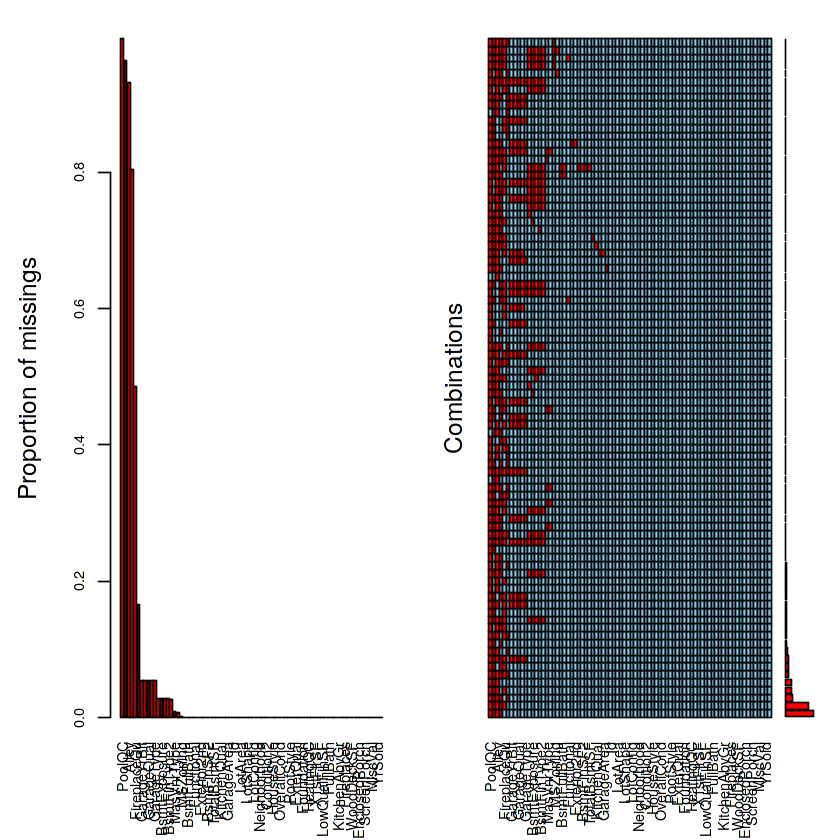

In [4]:
mice_plot<-aggr(data,numbers=TRUE,sortVars=TRUE,labels=names(data),cex.axis=0.7)

In [5]:
#NA as a factor level
data$PoolQC<-addNA(data$PoolQC)
data$MiscFeature<-addNA(data$MiscFeature)
data$Alley<-addNA(data$Alley)
data$Fence<-addNA(data$Fence)
data$FireplaceQu<-addNA(data$FireplaceQu)
data$GarageType<-addNA(data$GarageType)
data$GarageYrBlt<-addNA(data$GarageYrBlt)
data$GarageFinish<-addNA(data$GarageFinish)
data$GarageQual<-addNA(data$GarageQual)
data$GarageCond<-addNA(data$GarageCond)
data$BsmtExposure<-addNA(data$BsmtExposure)
data$BsmtFinType2<-addNA(data$BsmtFinType2)
data$BsmtQual<-addNA(data$BsmtQual)
data$BsmtCond<-addNA(data$BsmtCond)
data$BsmtFinType1<-addNA(data$BsmtFinType1)

In [6]:
#remove NA in mszoning
data$MSZoning<-replace(data$MSZoning,is.na(data$MSZoning),"RL") 

#remove NA in utilities
data$Utilities<-replace(data$Utilities,is.na(data$Utilities),"AllPub") 

#remove NA in bsmtfullbath
data$BsmtFullBath<-replace(data$BsmtFullBath,is.na(data$BsmtFullBath),0) 

#remove NA in bsmthalfbath
data$BsmtHalfBath<-replace(data$BsmtHalfBath,is.na(data$BsmtHalfBath),0)

#remove NA in functional
data$Functional<-replace(data$Functional,is.na(data$Functional),"Typ")

#remove NA in saletype
data$SaleType<-replace(data$SaleType,is.na(data$SaleType),"WD")

#remove NA in exterior1st
data$Exterior1st<-replace(data$Exterior1st,is.na(data$Exterior1st),"VinylSd")

#remove NA in exterior2nd
data$Exterior2nd<-replace(data$Exterior2nd,is.na(data$Exterior2nd),"VinylSd")

#remove NA in bsmtfinsf1
data$BsmtFinSF1<-replace(data$BsmtFinSF1,is.na(data$BsmtFinSF1),mean(data$BsmtFinSF1,na.rm=TRUE))

#remove NA in bsmtfinsf2
data$BsmtFinSF2<-replace(data$BsmtFinSF2,is.na(data$BsmtFinSF2),mean(data$BsmtFinSF2,na.rm=TRUE))

#remove NA in bsmtunfsf
data$BsmtUnfSF<-replace(data$BsmtUnfSF,is.na(data$BsmtUnfSF),mean(data$BsmtUnfSF,na.rm=TRUE))

#remove NA in totalbsmtsf
data$TotalBsmtSF<-data$BsmtFinSF1+data$BsmtFinSF2+data$BsmtUnfSF

#remove NA in garagearea
data$GarageArea<-replace(data$GarageArea,is.na(data$GarageArea),mean(data$GarageArea,na.rm=TRUE))

#remove NA in garagecars
data$GarageCars<-ifelse(is.na(data$GarageCars),median(data$GarageCars,na.rm=TRUE),data$GarageCars)

#remove NA in electrical variable using mode
data$KitchenQual<-replace(data$KitchenQual,is.na(data$KitchenQual),"TA") 

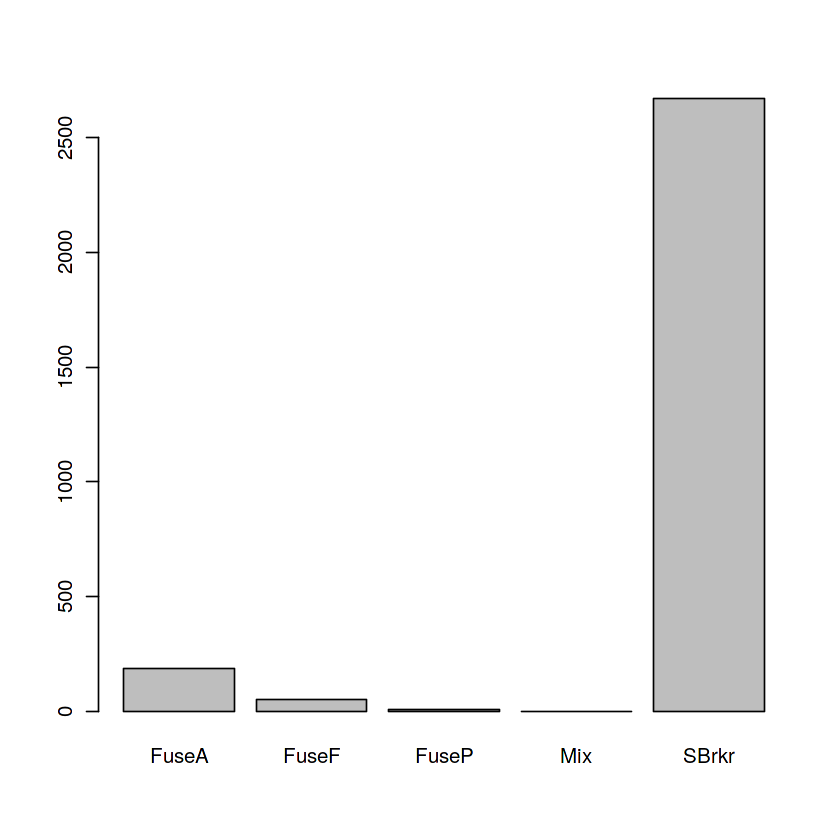

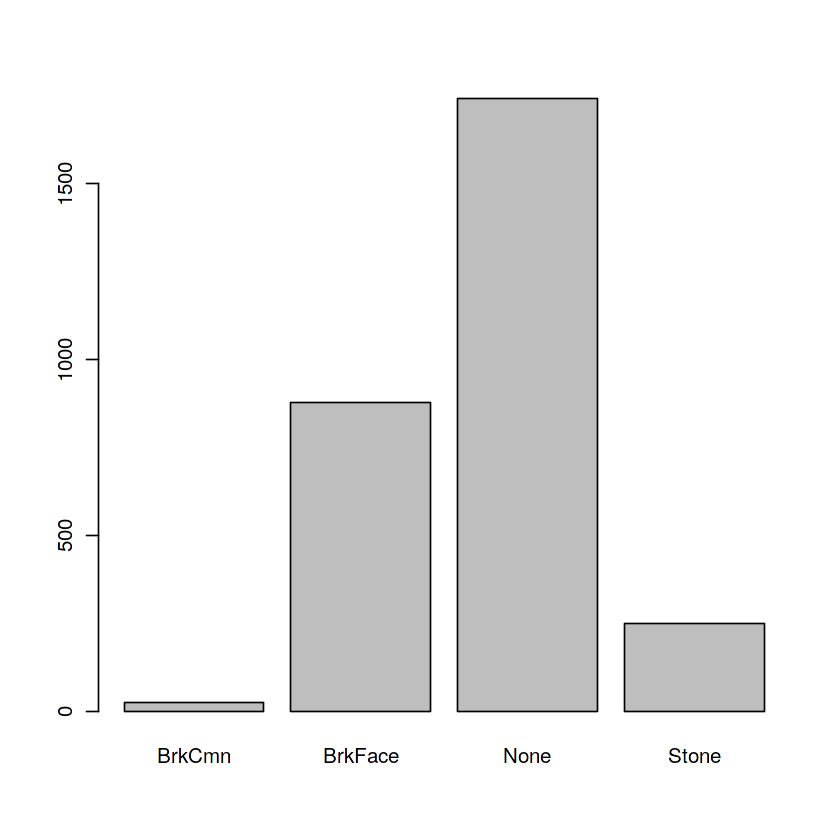

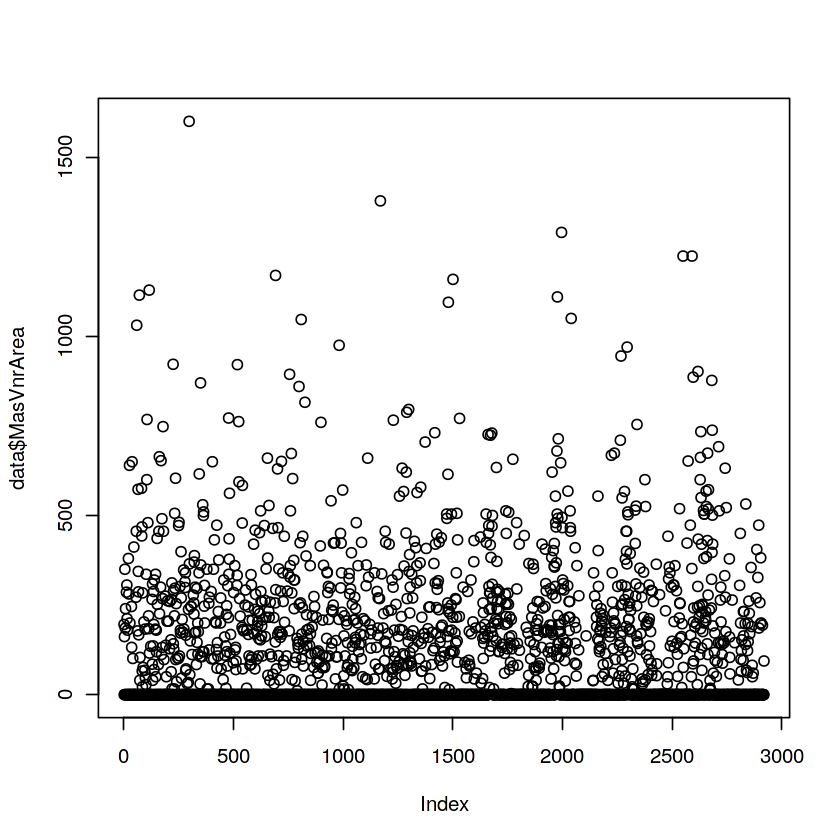

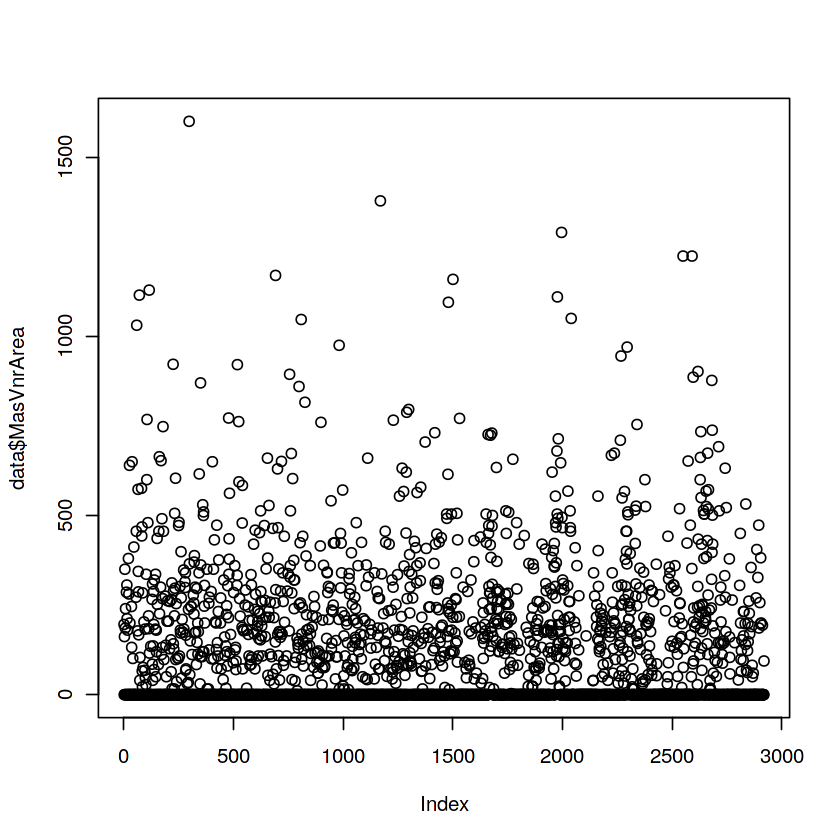

In [7]:
#remove NA in electrical variable using mode
plot(data$Electrical)
data$Electrical<-replace(data$Electrical,is.na(data$Electrical),"SBrkr") 

#remove NA in masvnrtype variable using mode
plot(data$MasVnrType)
data$MasVnrType<-replace(data$MasVnrType,is.na(data$MasVnrType),"None") 

#remove NA in masvnrarea variable using mode
plot(data$MasVnrArea)
data$MasVnrArea<-ifelse(is.na(data$MasVnrArea),median(data$MasVnrArea,na.rm=TRUE),data$MasVnrArea)

#remove NA in lotfrontage
plot(data$MasVnrArea)
data$LotFrontage<-ifelse(is.na(data$LotFrontage),median(data$LotFrontage,na.rm=TRUE),data$LotFrontage)

In [8]:
#NA TO None
levels(data$PoolQC)[is.na(levels(data$PoolQC))] <-"None"
levels(data$MiscFeature)[is.na(levels(data$MiscFeature))] <-"None"
levels(data$Alley)[is.na(levels(data$Alley))] <-"None"
levels(data$Fence)[is.na(levels(data$Fence))] <-"None"
levels(data$FireplaceQu)[is.na(levels(data$FireplaceQu))] <-"None"
levels(data$GarageType)[is.na(levels(data$GarageType))] <-"None"
levels(data$GarageYrBlt)[is.na(levels(data$GarageYrBlt))] <-"None"
levels(data$GarageFinish)[is.na(levels(data$GarageFinish))] <-"None"
levels(data$GarageQual)[is.na(levels(data$GarageQual))] <-"None"
levels(data$GarageCond)[is.na(levels(data$GarageCond))] <-"None"
levels(data$BsmtExposure)[is.na(levels(data$BsmtExposure))] <-"None"
levels(data$BsmtFinType2)[is.na(levels(data$BsmtFinType2))] <-"None"
levels(data$BsmtQual)[is.na(levels(data$BsmtQual))] <-"None"
levels(data$BsmtCond)[is.na(levels(data$BsmtCond))] <-"None"
levels(data$BsmtFinType1)[is.na(levels(data$BsmtFinType1))] <-"None"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   20.00   50.00   57.14   70.00  190.00 

[1] 0.3511477

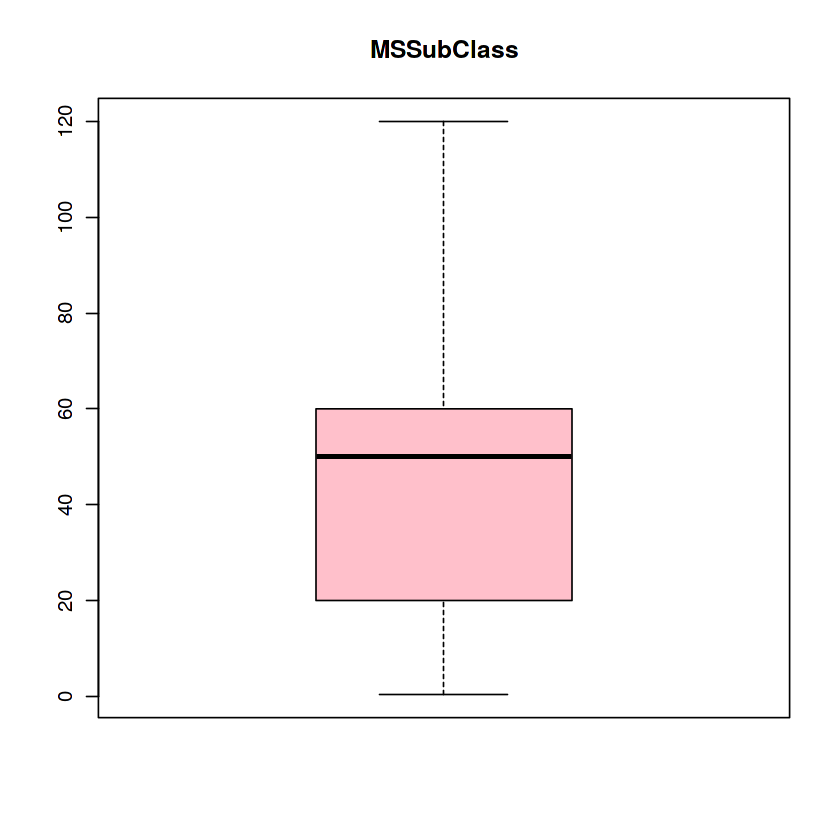

In [9]:
#outlier treatment
summary(data$MSSubClass)
mean(data$MSSubClass<70&data$MSSubClass>20)
data$MSSubClass[data$MSSubClass>(70+(1.5*50)) | data$MSSubClass<(20-(1.5*50))]<-0.3511477
boxplot(data$MSSubClass,col='pink',main="MSSubClass")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   60.00   68.00   69.09   78.00  313.00 

[1] 0.4237753

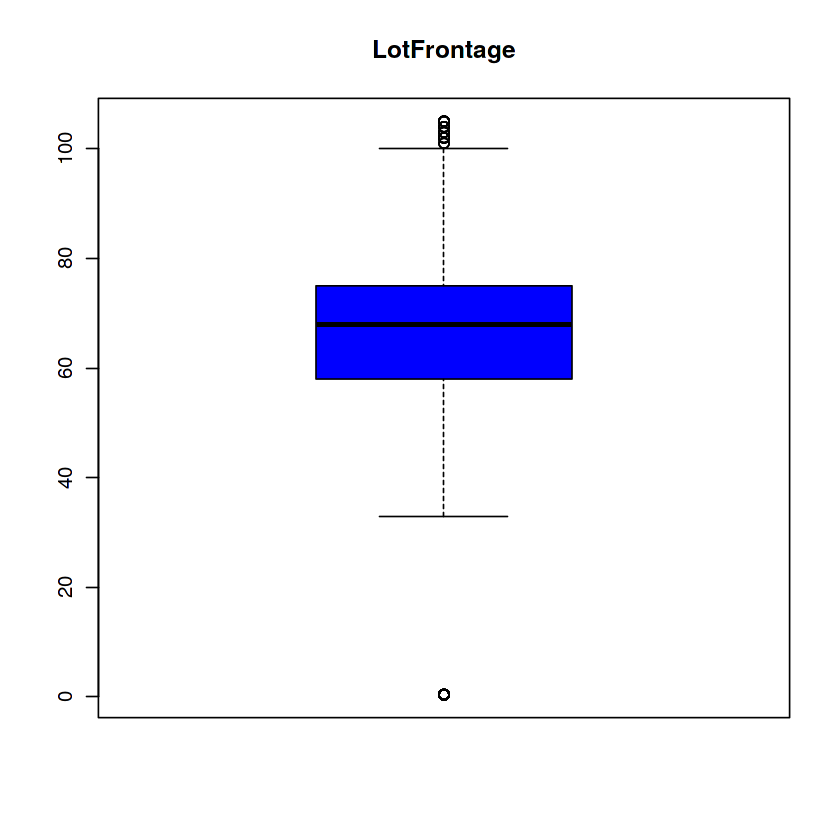

In [10]:
summary(data$LotFrontage)
mean(data$LotFrontage<78&data$LotFrontage>60)
data$LotFrontage[data$LotFrontage>(78+(1.5*18)) | data$LotFrontage<(60-(1.5*18))]<- 0.4237753
boxplot(data$LotFrontage,col='blue',main="LotFrontage")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1300    7478    9453   10168   11570  215245 

[1] 0.4998287

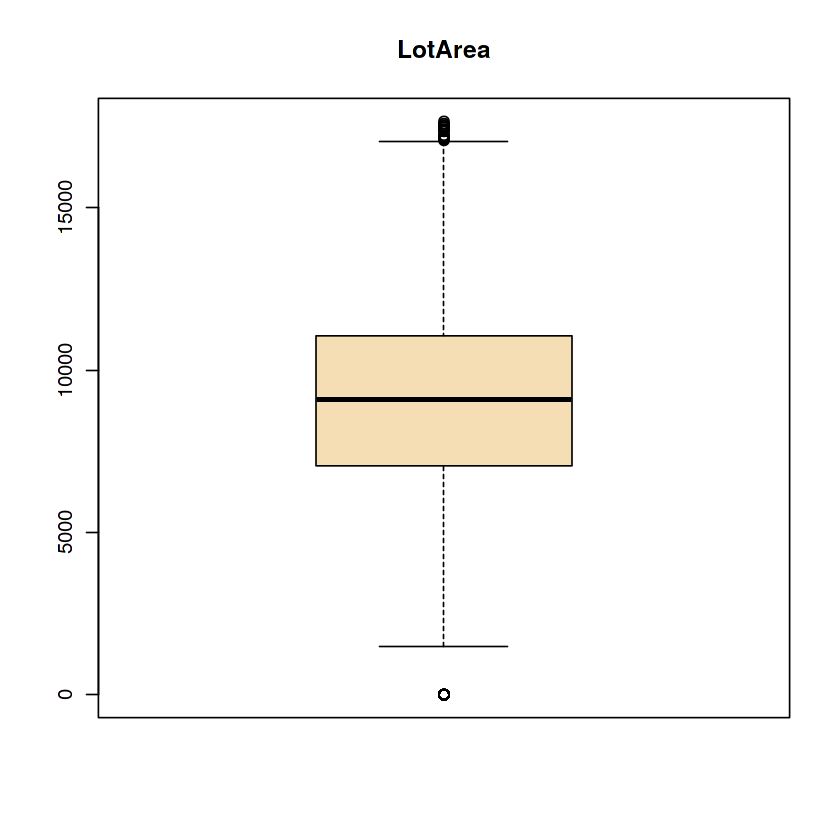

In [11]:
summary(data$LotArea)
mean(data$LotArea<11570&data$LotArea>7478)
data$LotArea[data$LotArea>(11570+(1.5*4092)) | data$LotArea<(7478-(1.5*4092))]<-0.4998287
boxplot(data$LotArea,col='wheat',main="LotArea")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   6.000   6.089   7.000  10.000 

[1] 0.2504282

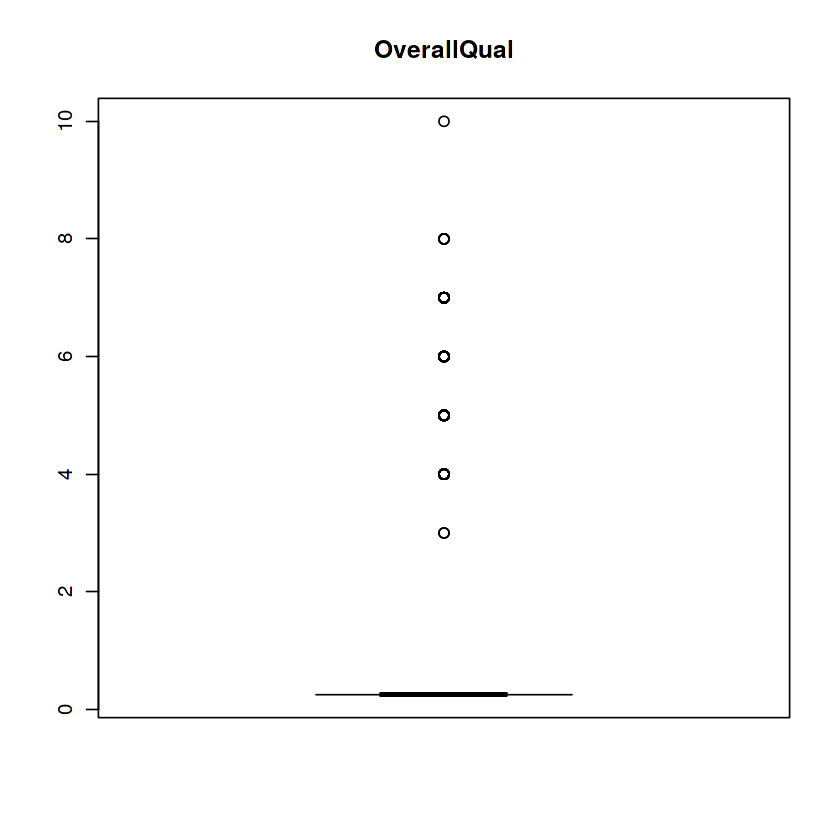

In [12]:
summary(data$OverallQual)#incr
mean(data$OverallQual<7&data$OverallQual>5)
data$OverallQual[data$MSSubClass>(7+(1.5*2))|data$OverallQual<(5-(1.5*2))]<-0.2504282
boxplot(data$OverallQual,col='blue',notch = 1,main="OverallQual")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   5.000   5.565   6.000   9.000 

[1] 0

Warning message in bxp(structure(list(stats = structure(c(4, 5, 5, 6, 7), .Dim = c(5L, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

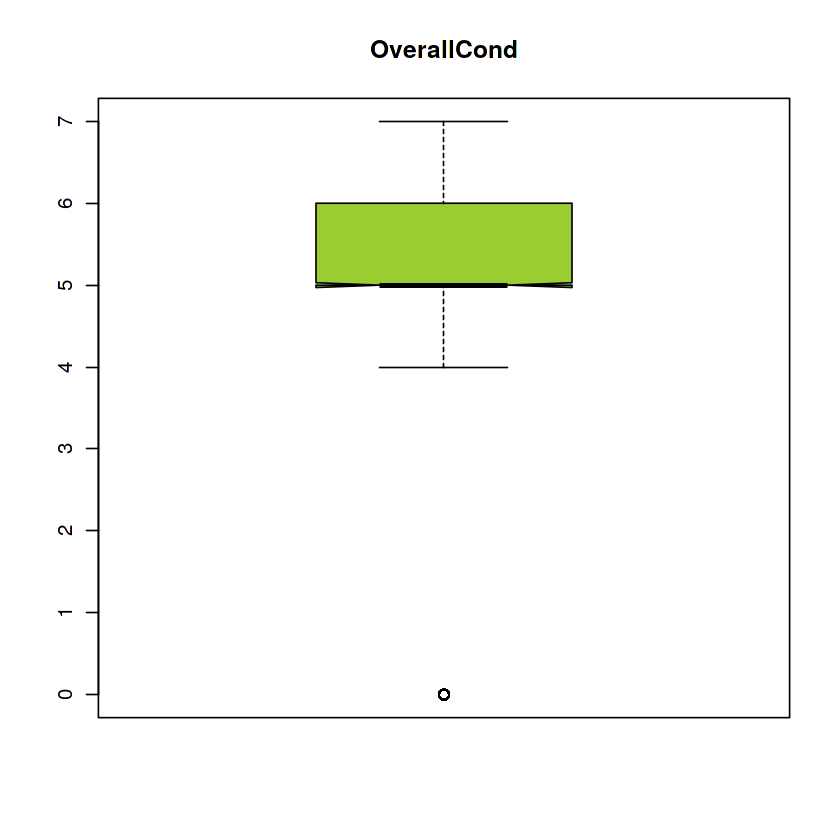

In [13]:
summary(data$OverallCond)
mean(data$OverallCond<6&data$OverallCond>5)
data$OverallCond[data$OverallCond>(6+(1.5*1))|data$OverallCond<(5-(1.5*1))]<-0
boxplot(data$OverallCond,col='yellowgreen',notch = 1,main="OverallCond")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   101.4   163.5  1600.0 

[1] 0.1459404

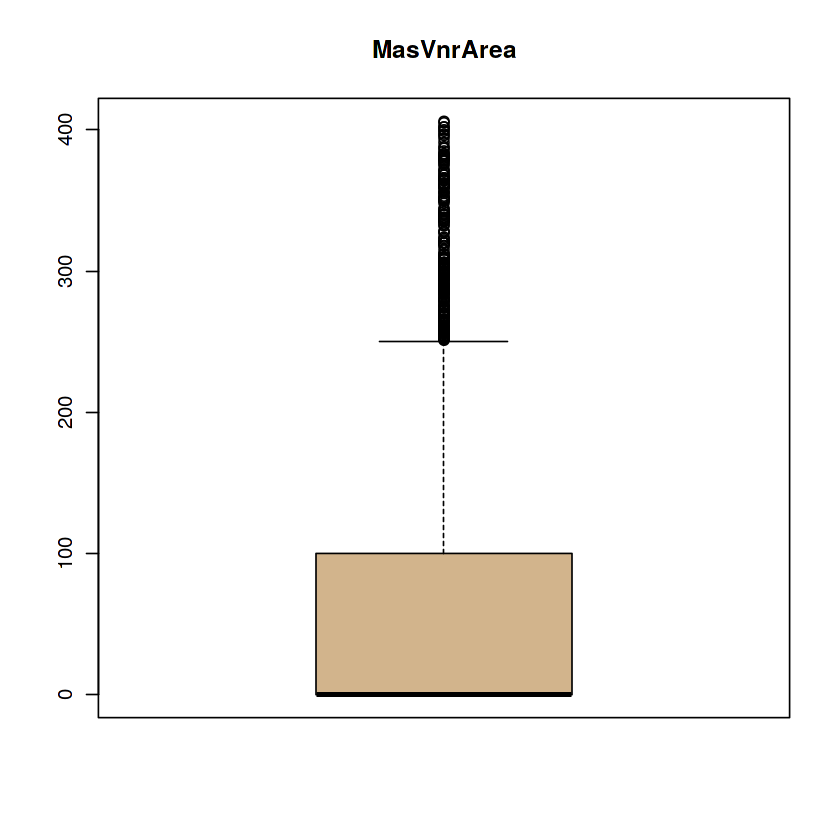

In [14]:
summary(data$MasVnrArea)
mean(data$MasVnrArea<163&data$MasVnrArea>0)
data$MasVnrArea[data$MasVnrArea>(163+(1.5*163))|data$MasVnrArea<(0-(1.5*163))]<-0.1459404
boxplot(data$MasVnrArea,col='tan',main="MasVnrArea")#more

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0   369.0   441.4   733.0  5644.0 

[1] 0.4309695

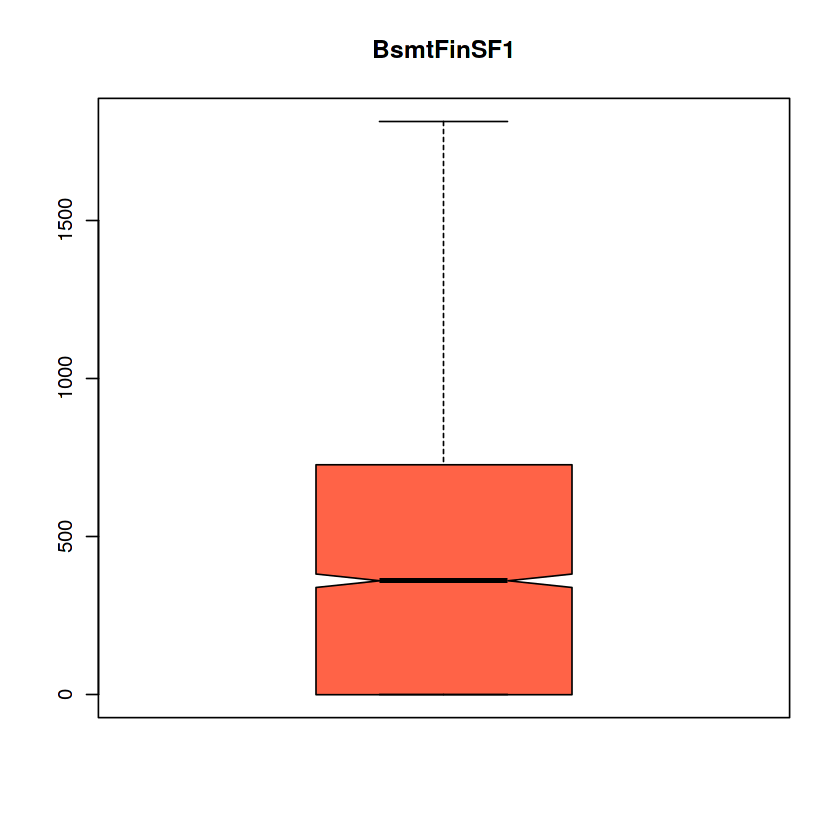

In [15]:
summary(data$BsmtFinSF1)
mean(data$BsmtFinSF1<733&data$BsmtFinSF1>0)
data$BsmtFinSF1[data$BsmtFinSF1>(733+(1.5*733))|data$BsmtFinSF1<(0-(1.5*733))]<-0.4309695
boxplot(data$BsmtFinSF1,col='tomato',notch=1,main="BsmtFinSF1")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   220.0   467.0   560.8   805.0  2336.0 

[1] 0.4994861

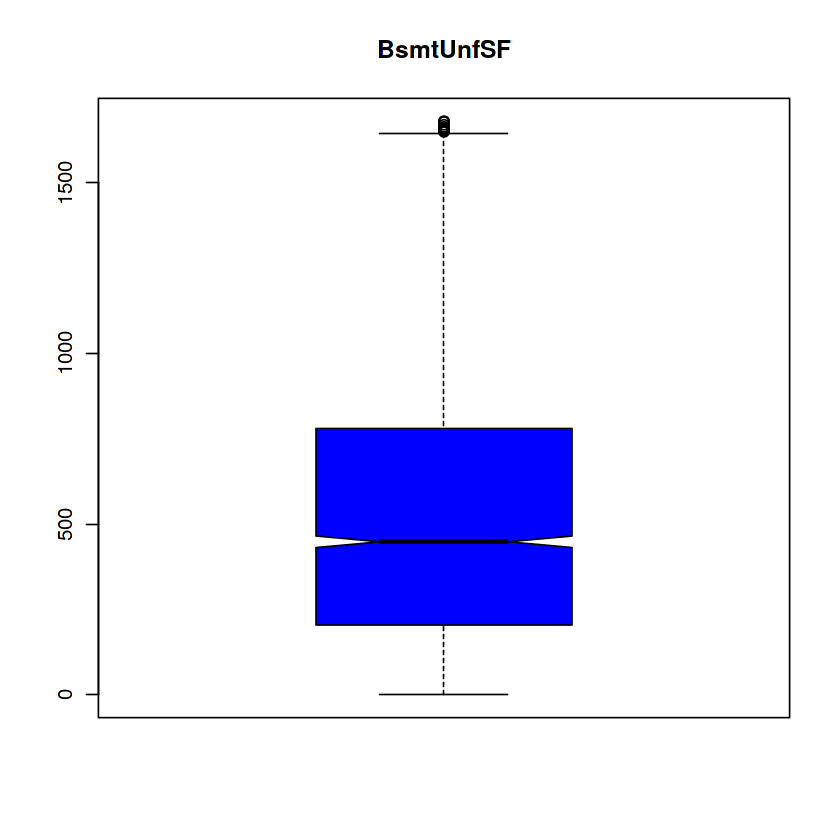

In [16]:
summary(data$BsmtUnfSF)
mean(data$BsmtUnfSF<805&data$BsmtUnfSF>220)
data$BsmtUnfSF[data$BsmtUnfSF>(805+(1.5*585))|data$BsmtUnfSF<(220-(1.5*585))]<- 0.4994861
boxplot(data$BsmtUnfSF ,col='blue',notch=1,main="BsmtUnfSF")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     793     990    1052    1302    6110 

[1] 0.4974306

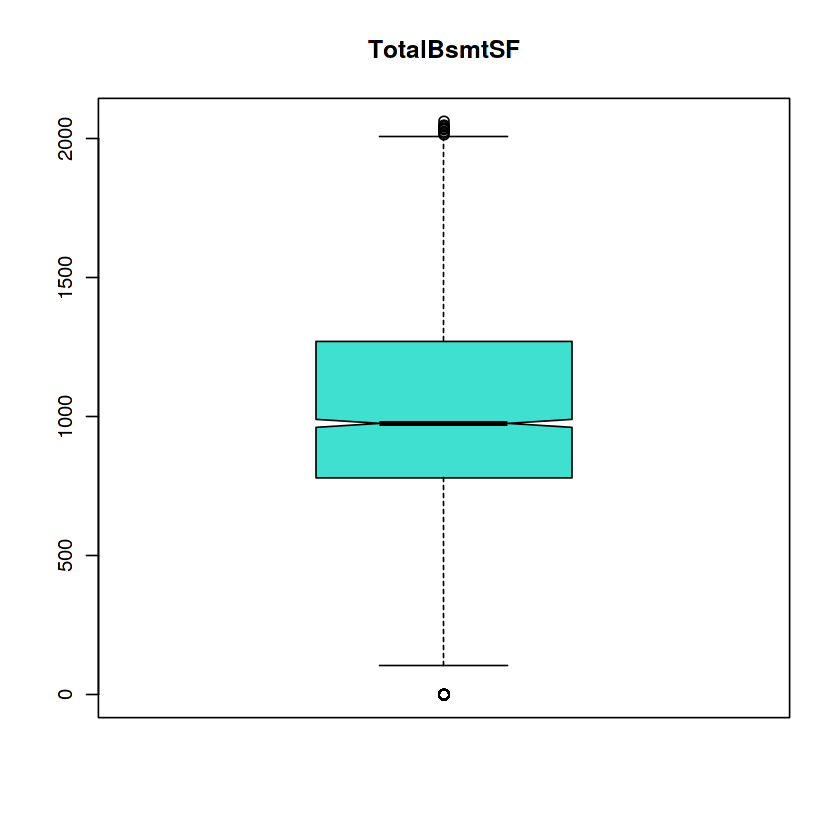

In [17]:
summary(data$TotalBsmtSF)
mean(data$TotalBsmtSF<1302&data$TotalBsmtSF>793)
data$TotalBsmtSF[data$TotalBsmtSF>(1302+(1.5*509))|data$TotalBsmtSF<(793-(1.5*509))]<-0.4974306
boxplot(data$TotalBsmtSF,col='turquoise',notch=1,main="TotalBsmtSF")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    334     876    1082    1160    1388    5095 

[1] 0.4994861

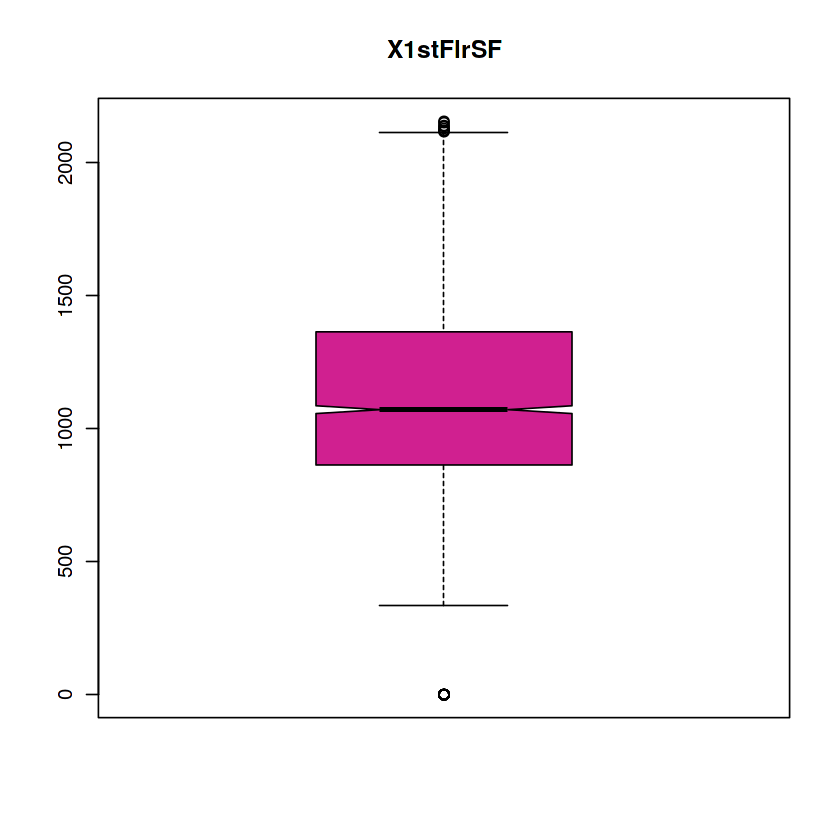

In [18]:
summary(data$X1stFlrSF)
mean(data$X1stFlrSF<1388&data$X1stFlrSF>876)
data$X1stFlrSF[data$X1stFlrSF>(1388+(1.5*512))|data$X1stFlrSF<(876-(1.5*512))]<- 0.4965753
boxplot(data$X1stFlrSF ,col='violetred',notch=1,main="X1stFlrSF")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   336.5   704.0  2065.0 

[1] 0.177458

Warning message in bxp(structure(list(stats = structure(c(0, 0, 0, 702, 1721), .Dim = c(5L, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

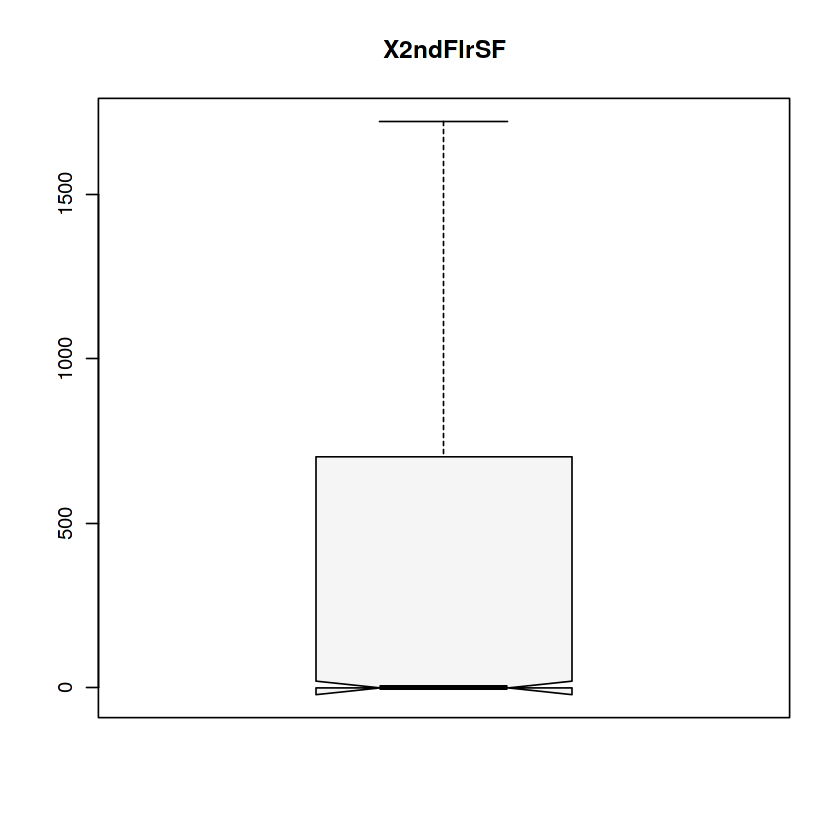

In [19]:
summary(data$X2ndFlrSF)
mean(data$X2ndFlrSF<704&data$X2ndFlrSF>0)
data$X2ndFlrSF[data$X2ndFlrSF>(704+(1.5*704))|data$X2ndFlrSF<(0-(1.5*704))]<-0.177458
boxplot(data$X2ndFlrSF,col='whitesmoke',notch=1,main="X2ndFlrSF")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    334    1126    1444    1501    1744    5642 

[1] 0.498801

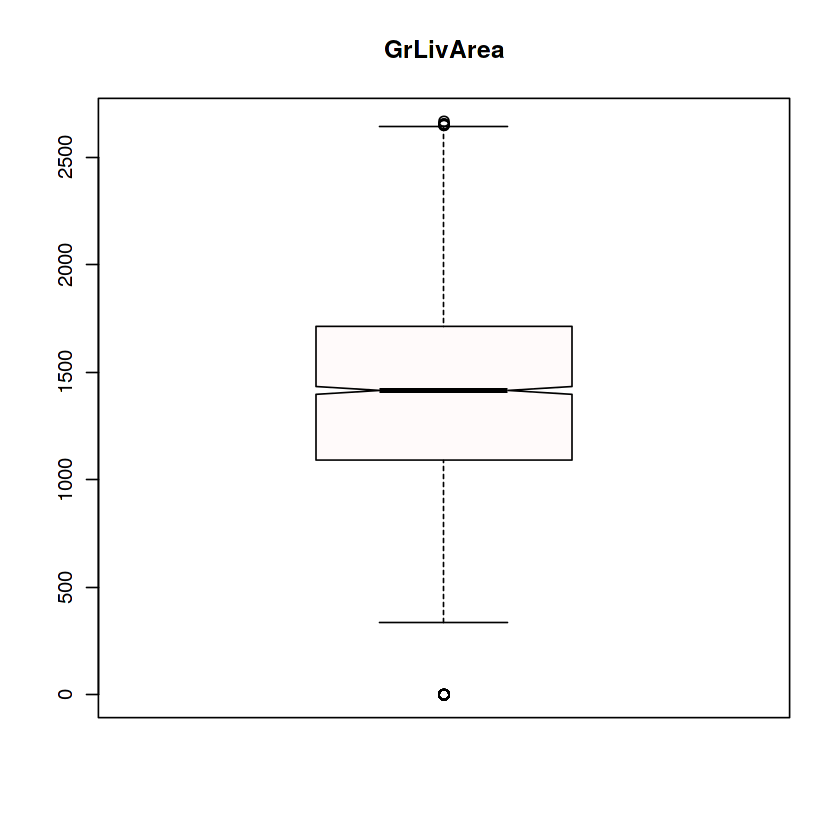

In [20]:
summary(data$GrLivArea)
mean(data$GrLivArea<1744&data$GrLivArea>1126)
data$GrLivArea[data$GrLivArea>(1744+(1.5*618))|data$GrLivArea<(1126-(1.5*618))]<-0.498801
boxplot(data$GrLivArea,col='snow',notch=1,main="GrLivArea")#more

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   6.000   6.452   7.000  15.000 

[1] 0.2891401

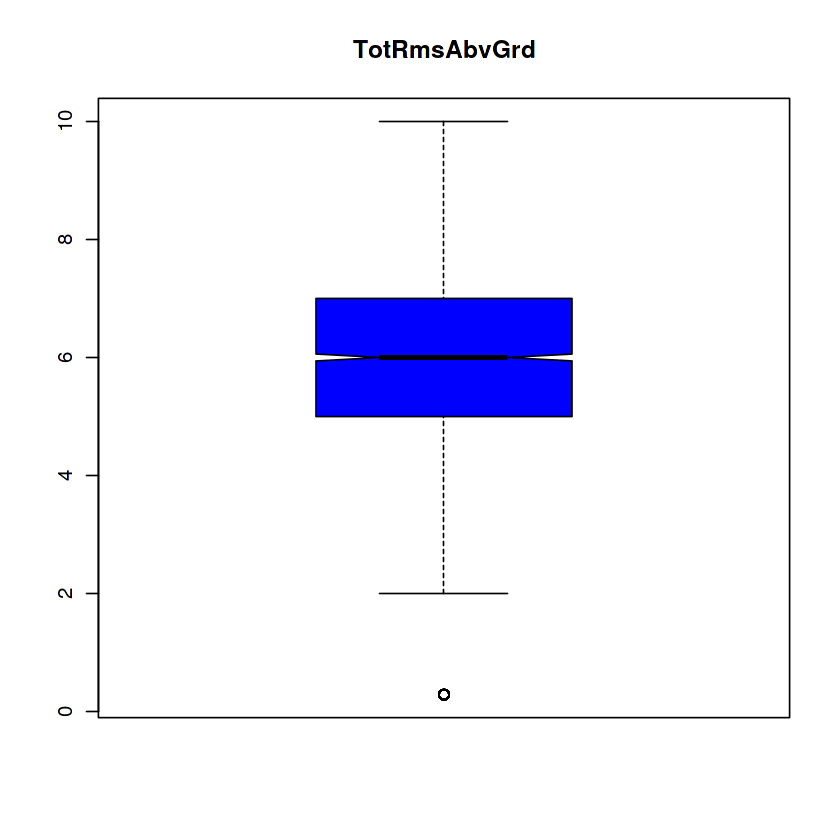

In [21]:
summary(data$TotRmsAbvGrd)
mean(data$TotRmsAbvGrd<7&data$TotRmsAbvGrd>5)
data$TotRmsAbvGrd[data$TotRmsAbvGrd>(7+(1.5*2))|data$TotRmsAbvGrd<(5-(1.5*2))]<- 0.2891401
boxplot(data$ TotRmsAbvGrd,col='blue',notch=1,main="TotRmsAbvGrd")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5971  1.0000  4.0000 

[1] 0

Warning message in bxp(structure(list(stats = structure(c(0, 0, 1, 1, 2), .Dim = c(5L, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

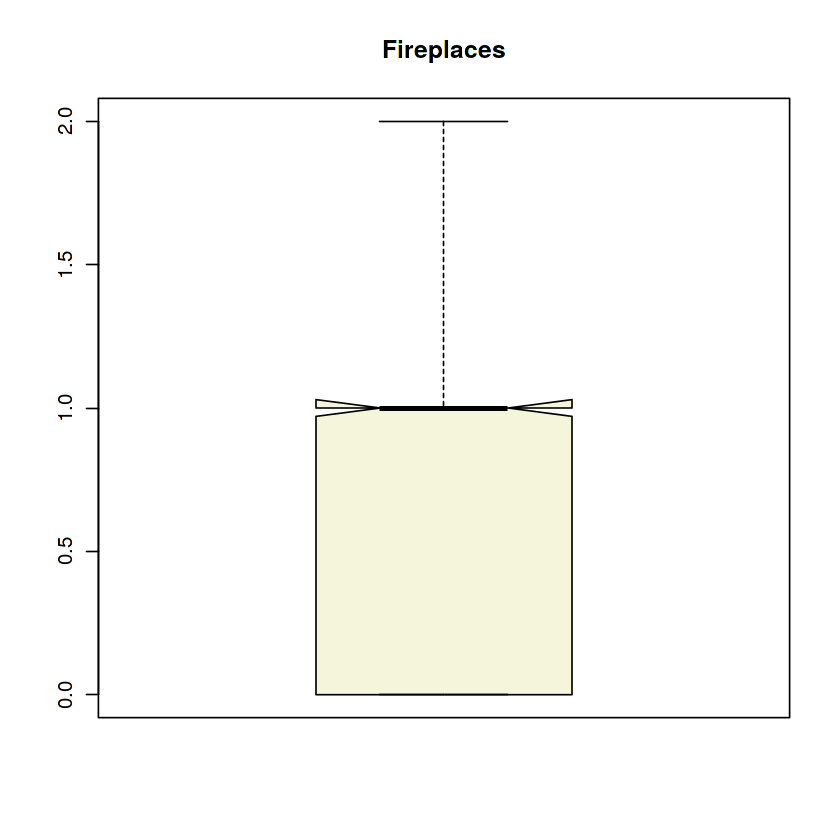

In [22]:
summary(data$Fireplaces)
mean(data$Fireplaces<1&data$Fireplaces>0)
data$Fireplaces[data$Fireplaces>(1+(1.5*1))|data$Fireplaces<(0-(1.5*1))]<-0
boxplot(data$Fireplaces,col='beige',notch=1,main="Fireplaces")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   320.0   480.0   472.9   576.0  1488.0 

[1] 0.4710517

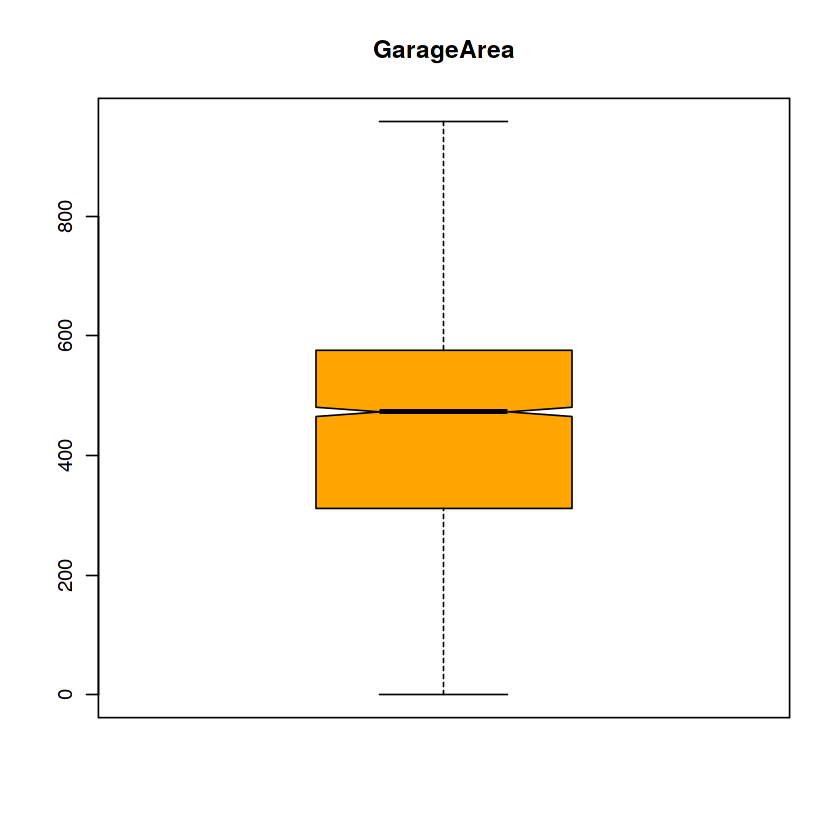

In [23]:
summary(data$GarageArea)
mean(data$GarageArea<576&data$GarageArea>320)
data$GarageArea[data$GarageArea>(576+(1.5*256))|data$GarageArea<(320-(1.5*256))]<-0.4710517
boxplot(data$ GarageArea,col='orange',notch=1,main="GarageArea")#more outlier

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   93.71  168.00 1424.00 

[1] 0.2165125

Warning message in bxp(structure(list(stats = structure(c(0, 0, 0, 160, 400), .Dim = c(5L, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

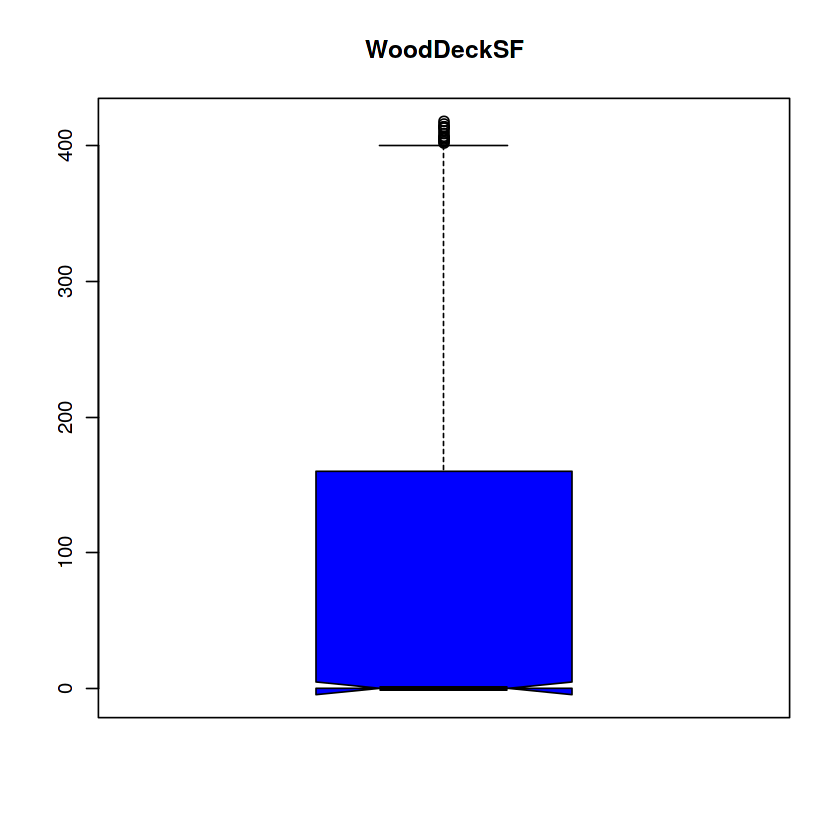

In [24]:
summary(data$WoodDeckSF)
mean(data$WoodDeckSF<168&data$WoodDeckSF>0)
data$WoodDeckSF[data$WoodDeckSF>(168+(1.5*168))|data$WoodDeckSF<(0-(1.5*168))]<- 0.2165125
boxplot(data$WoodDeckSF,col='blue',notch=1,main="WoodDeckSF")#more outlier

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   26.00   47.49   70.00  742.00 

[1] 0.3035286

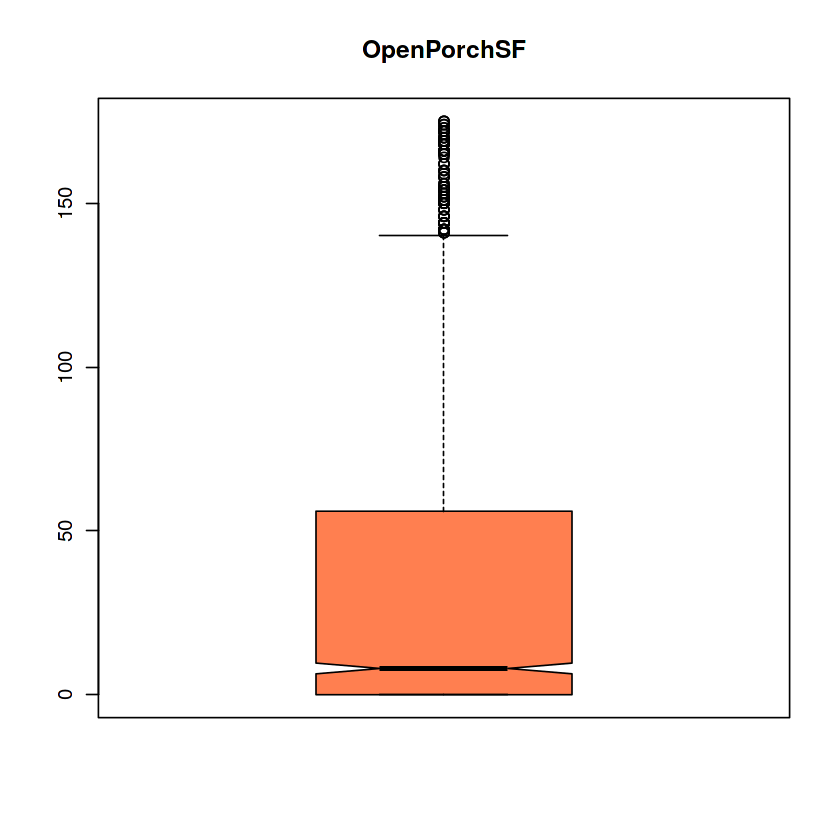

In [25]:
summary(data$OpenPorchSF)
mean(data$OpenPorchSF<70&data$OpenPorchSF>0)
data$OpenPorchSF[data$OpenPorchSF>(70+(1.5*70))|data$OpenPorchSF<(0-(1.5*70))]<-0.3035286
boxplot(data$OpenPorchSF,col='coral',notch=1,main="OpenPorchSF")#outlier more

In [26]:
#encoding ordinal variables
unique(data$ExterQual)
data$ExterQual<-factor(data$ExterQual,labels=c("5","2","4","3"))

unique(data$ExterCond)
data$ExterCond <- factor(data$ExterCond,labels=c("5","2","4","1","3"))

unique(data$BsmtQual)
data$BsmtQual <- factor(data$BsmtQual,labels=c("5","2","4","0","3"))

unique(data$BsmtCond)
data$BsmtCond <- factor(data$BsmtCond,labels=c("2","4","0","1","3"))

unique(data$HeatingQC)
data$HeatingQC <- factor(data$HeatingQC,labels=c("5","2","4","1","3"))

unique(data$KitchenQual)
data$KitchenQual <- factor(data$KitchenQual,labels=c("5","2","4","3"))

unique(data$FireplaceQu)
data$FireplaceQu <- factor(data$FireplaceQu,labels=c("5","2","4","0","1","3"))

unique(data$GarageQual)
data$GarageQual <- factor(data$GarageQual,labels=c("5","2","4","0","1","3"))

unique(data$GarageCond)
data$GarageCond <- factor(data$GarageCond,labels=c("5","2","4","0","1","3"))

unique(data$PoolQC)
data$PoolQC <- factor(data$PoolQC,labels=c("5","2","4","0"))

unique(data$BsmtExposure)
data$BsmtExposure<-factor(data$BsmtExposure,labels=c("3","4","2","1","0"))

unique(data$BsmtFinType1)
data$BsmtFinType1<-factor(data$BsmtFinType1,labels=c("5","4","6","2","0","3","1"))

unique(data$BsmtFinType2)
data$BsmtFinType2<-factor(data$BsmtFinType2,labels=c("5","4","6","2","0","3","1"))

unique(data$Functional)
data$Functional<- factor(data$Functional,labels = c("4","3","7","6","5","2","8"))

unique(data$GarageFinish)
data$GarageFinish<-factor(data$GarageFinish,labels=c("3","0","2","1"))

unique(data$Fence)
data$Fence<-factor(data$Fence,labels=c("4","2","3","1","0"))

unique(data$CentralAir)
data$CentralAir<-factor(data$CentralAir,labels=c("0","1"))

unique(data$Electrical)
data$Electrical<-factor(data$Electrical,labels=c("3","2","1","0","4"))

[1] Gd TA Ex Fa
Levels: Ex Fa Gd TA

[1] TA Gd Fa Po Ex
Levels: Ex Fa Gd Po TA

[1] Gd   TA   Ex   None Fa  
Levels: Ex Fa Gd TA None

[1] TA   Gd   None Fa   Po  
Levels: Fa Gd Po TA None

[1] Ex Gd TA Fa Po
Levels: Ex Fa Gd Po TA

[1] Gd TA Ex Fa
Levels: Ex Fa Gd TA

[1] None TA   Gd   Fa   Ex   Po  
Levels: Ex Fa Gd Po TA None

[1] TA   Fa   Gd   None Ex   Po  
Levels: Ex Fa Gd Po TA None

[1] TA   Fa   None Gd   Po   Ex  
Levels: Ex Fa Gd Po TA None

[1] None Ex   Fa   Gd  
Levels: Ex Fa Gd None

[1] No   Gd   Mn   Av   None
Levels: Av Gd Mn No None

[1] GLQ  ALQ  Unf  Rec  BLQ  None LwQ 
Levels: ALQ BLQ GLQ LwQ Rec Unf None

[1] Unf  BLQ  None ALQ  Rec  LwQ  GLQ 
Levels: ALQ BLQ GLQ LwQ Rec Unf None

[1] Typ  Min1 Maj1 Min2 Mod  Maj2 Sev 
Levels: Maj1 Maj2 Min1 Min2 Mod Sev Typ

[1] RFn  Unf  Fin  None
Levels: Fin RFn Unf None

[1] None  MnPrv GdWo  GdPrv MnWw 
Levels: GdPrv GdWo MnPrv MnWw None

[1] Y N
Levels: N Y

[1] SBrkr FuseF FuseA FuseP Mix  
Levels: FuseA FuseF FuseP Mix SBrkr

In [27]:
#one hot encoding
datae<-data[,c(1,2)]
for(unique_value in unique(data$MSZoning)){
  datae[paste("MSZoning", unique_value, sep = ".")] <- ifelse(data$MSZoning == unique_value, 1, 0)
}

datae<-cbind(datae,data[,c(4,5)])

for(unique_value in unique(data$Street)){
  datae[paste("Street", unique_value, sep = ".")] <- ifelse(data$Street == unique_value, 1, 0)
}

for(unique_value in unique(data$Alley)){
  datae[paste("Alley", unique_value, sep = ".")] <- ifelse(data$Alley == unique_value, 1, 0)
}

for(unique_value in unique(data$LotShape)){
  datae[paste("Lotshape", unique_value, sep = ".")] <- ifelse(data$LotShape == unique_value, 1, 0)
}

for(unique_value in unique(data$LandContour)){
  datae[paste("LandContour", unique_value, sep = ".")] <- ifelse(data$LandContour == unique_value, 1, 0)
}


for(unique_value in unique(data$Utilities)){
  datae[paste("Utilities", unique_value, sep = ".")] <- ifelse(data$Utilities == unique_value, 1, 0)
}

for(unique_value in unique(data$LotConfig)){
  datae[paste("LotConfig", unique_value, sep = ".")] <- ifelse(data$LotConfig == unique_value, 1, 0)
}

for(unique_value in unique(data$LandSlope)){
  datae[paste("LandSlope", unique_value, sep = ".")] <- ifelse(data$LandSlope == unique_value, 1, 0)
}

for(unique_value in unique(data$Neighborhood)){
  datae[paste("Neighbourhood", unique_value, sep = ".")] <- ifelse(data$Neighborhood == unique_value, 1, 0)
}

for(unique_value in unique(data$Condition1)){
  datae[paste("Condition1", unique_value, sep = ".")] <- ifelse(data$Condition1 == unique_value, 1, 0)
}

for(unique_value in unique(data$Condition2)){
  datae[paste("Condition2", unique_value, sep = ".")] <- ifelse(data$Condition2 == unique_value, 1, 0)
}

for(unique_value in unique(data$BldgType)){
  datae[paste("BldgType", unique_value, sep = ".")] <- ifelse(data$BldgType == unique_value, 1, 0)
}

for(unique_value in unique(data$HouseStyle)){
  datae[paste("HouseStyle", unique_value, sep = ".")] <- ifelse(data$HouseStyle == unique_value, 1, 0)
}

datae<-cbind(datae,data[,c(18,19,20,21)])
for(unique_value in unique(data$RoofStyle)){
  datae[paste("RoofStyle", unique_value, sep = ".")] <- ifelse(data$RoofStyle == unique_value, 1, 0)
}


for(unique_value in unique(data$RoofMatl)){
  datae[paste("RoofMatl", unique_value, sep = ".")] <- ifelse(data$RoofMatl == unique_value, 1, 0)
}

for(unique_value in unique(data$Exterior1st)){
  datae[paste("Exterior1st", unique_value, sep = ".")] <- ifelse(data$Exterior1st == unique_value, 1, 0)
}

for(unique_value in unique(data$Exterior2nd)){
  datae[paste("Exterior2nd", unique_value, sep = ".")] <- ifelse(data$Exterior2nd == unique_value, 1, 0)
}


for(unique_value in unique(data$MasVnrType)){
  datae[paste("MasVnrType", unique_value, sep = ".")] <- ifelse(data$MasVnrType == unique_value, 1, 0)
}

datae<-cbind(datae,data[,c(27,28,29)])
for(unique_value in unique(data$Foundation)){
  datae[paste("Foundation", unique_value, sep = ".")] <- ifelse(data$Foundation == unique_value, 1, 0)
}

datae<-cbind(datae,data[,c(31:39)])
for(unique_value in unique(data$Heating)){
  datae[paste("Heating", unique_value, sep = ".")] <- ifelse(data$Heating == unique_value, 1, 0)
}

datae<-cbind(datae,data[,c(41:58)])
for(unique_value in unique(data$GarageType)){
  datae[paste("GarageType", unique_value, sep = ".")] <- ifelse(data$GarageType == unique_value, 1, 0)
}

datae<-cbind(datae,data[,c(60:74)])
for(unique_value in unique(data$MiscFeature)){
  datae[paste("MiscFeature", unique_value, sep = ".")] <- ifelse(data$MiscFeature == unique_value, 1, 0)
}

datae<-cbind(datae,data[,c(76:78)])
for(unique_value in unique(data$SaleType)){
  datae[paste("SaleType", unique_value, sep = ".")] <- ifelse(data$SaleType == unique_value, 1, 0)
}

for(unique_value in unique(data$SaleCondition)){
  datae[paste("SaleCondition", unique_value, sep = ".")] <- ifelse(data$SaleCondition == unique_value, 1, 0)
}

In [28]:
index<-datae[1]
datae<-datae[-1]

datae = as.matrix(as.data.frame(lapply(datae, as.numeric)))

for(i in 1:ncol(datae)){
  max<-max(datae[,i])
  min<-min(datae[,i])
  for(j in 1:nrow(datae)){
    datae[j,i]<-(datae[j,i]-min)/(max-min)
  }
}

In [29]:
train<-cbind(datae[1:1460,],train[81])
test<-datae[1461:2919,]

library(caret)
pca<-preProcess(x=train[-227],method='pca',pcaComp=15)
p<-predict(pca,train)
test<-predict(pca,test)
data<-p

var<-SalePrice~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PC11+PC12+PC13+PC14+PC15

Warning message:
“replacing previous import ‘ggplot2::empty’ by ‘plyr::empty’ when loading ‘caret’”
Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [30]:
#CREATING RANDOM FOREST
library(randomForest)

set.seed(1234)
regressor<-randomForest(x=data[-1],y=data$SalePrice,ntree=1000)
y_pred=predict(regressor,test)
head(y_pred)

sub<-cbind(index[1461:2919,],y_pred)

colnames(sub)<-c("Id","SalePrice")

write.csv(sub,"submission.csv",row.names=FALSE)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



1        2        3        4        5        6 
127509.4 177205.3 189177.4 217201.7 188644.8 184479.4